In [1]:
#import library that need to use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#EDA preforming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
sns.set(style = 'darkgrid' ,font = 'Rubik', font_scale = 1.1, rc={'axes.facecolor':'#fff8dc', 'figure.facecolor':'#fff8dc',
                                                                   "axes.spines.right": False, "axes.spines.top": False})

findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.


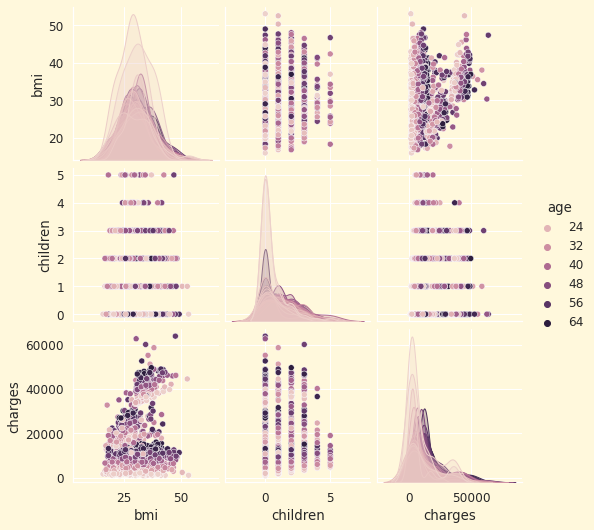

In [8]:
#create pairplot
sns.pairplot(df,hue="age")

Text(0.5, 1.0, 'Distribution of charges')

<Figure size 720x432 with 0 Axes>

findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.


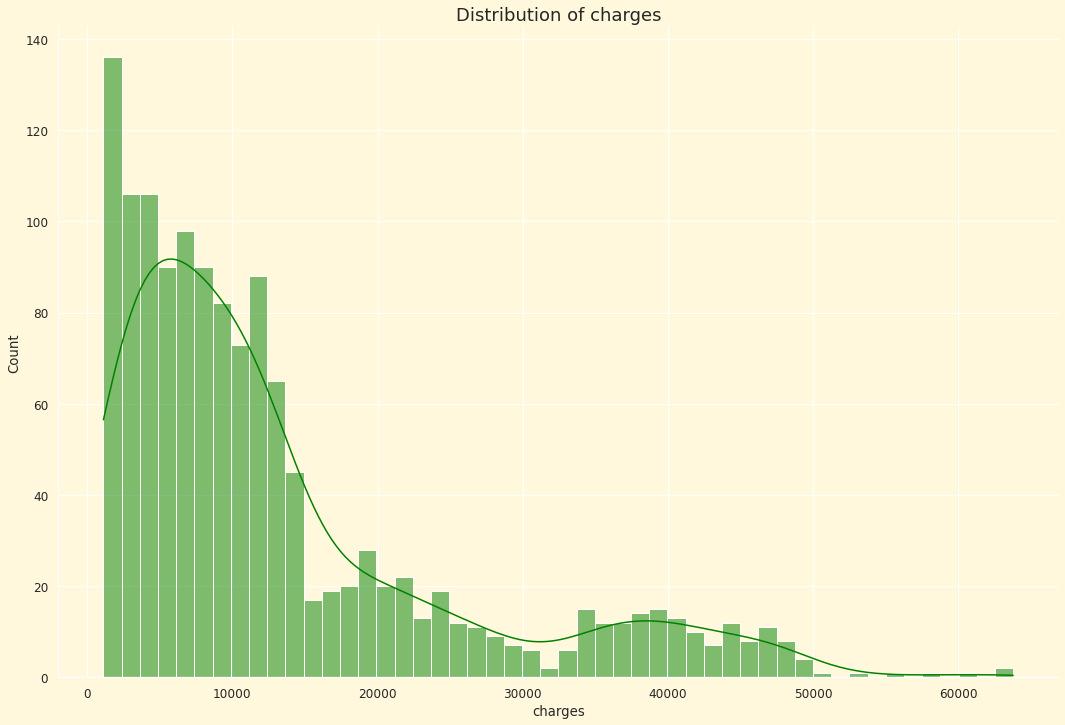

In [9]:
plt.figure(figsize = (10, 6))
sns.displot(x = 'charges', data = df, bins = 50, kde = True, height = 10, aspect = 1.5, color = 'Green')
plt.title('Distribution of charges', fontsize = 18)

In [10]:
#boxplot for each feature
def boxplot(col_name):
    axes = plt.subplots(nrows=1, ncols=1, figsize = (14, 10))
    sns.countplot(ax = axes[1], x = col_name , data = df, palette = 'magma')
    axes[1].set_title((col_name + ' Count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.4)

findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.


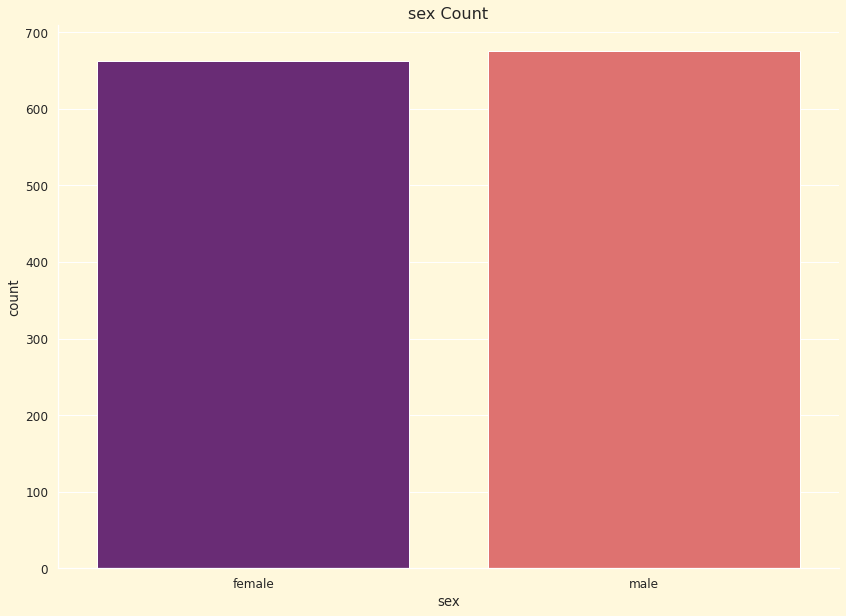

In [11]:
boxplot('sex')

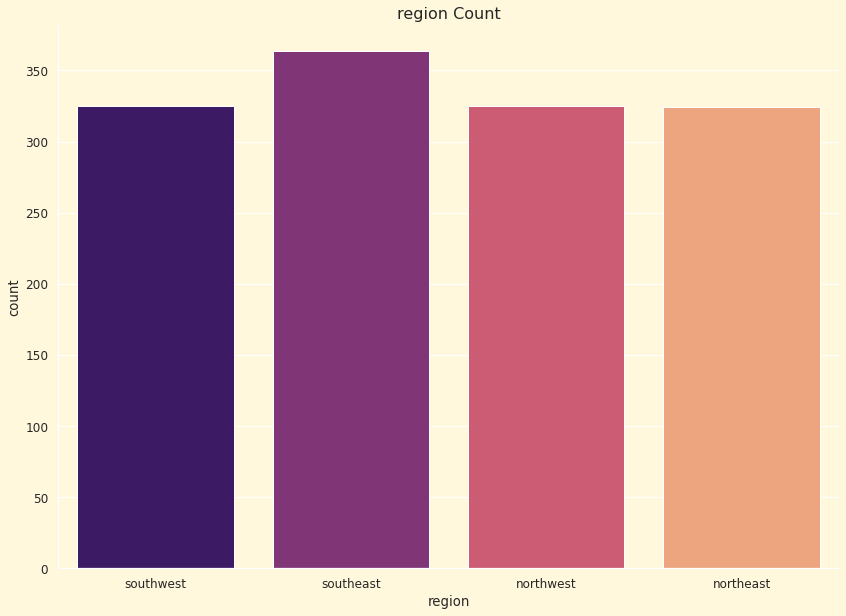

In [12]:
boxplot('region')

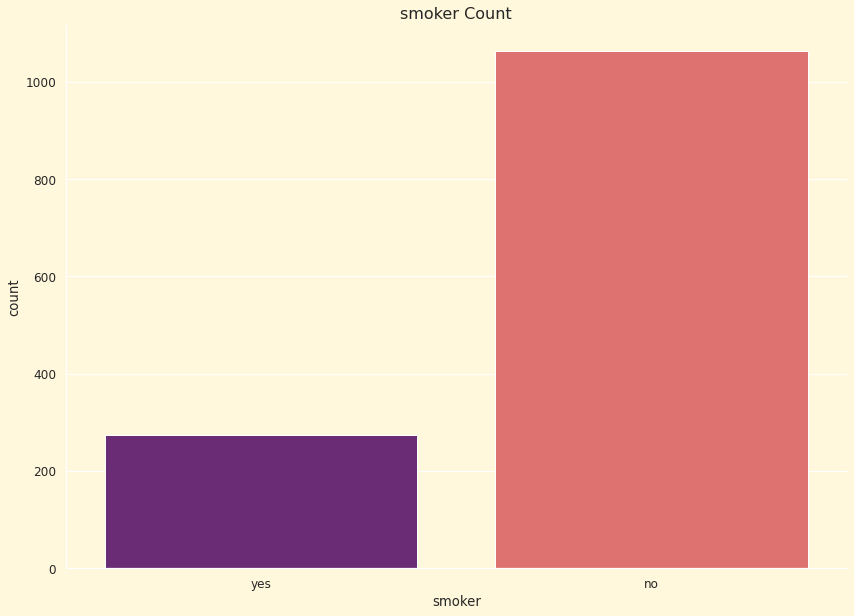

In [13]:
boxplot('smoker')

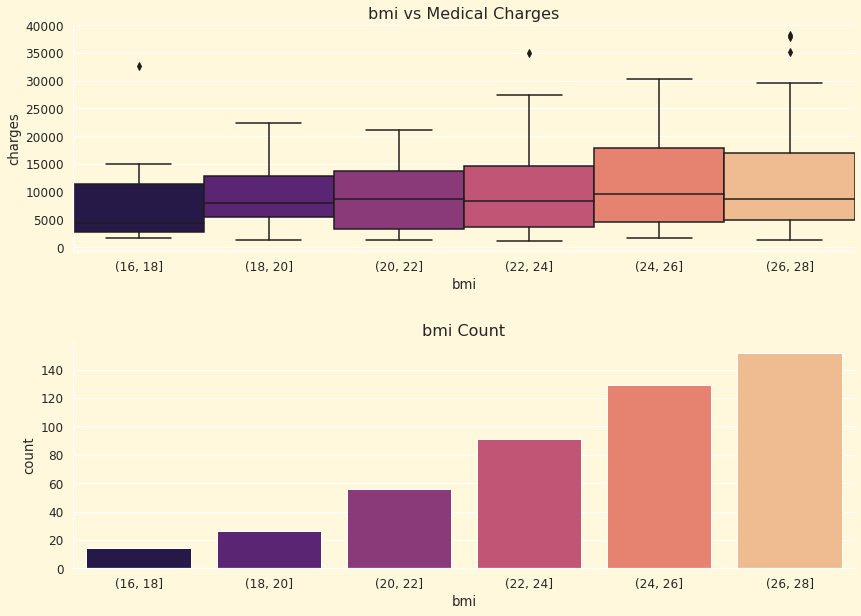

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (14, 10))
sns.boxplot(ax = axes[0], x = pd.cut(df['bmi'], [16,18,20,22,24,26,28]) , y = 'charges', data = df, 
            width = 1, palette = 'magma')
axes[0].ticklabel_format(style = 'plain', axis = 'y')
axes[0].set_title('bmi vs Medical Charges', fontsize = 16)

sns.countplot(ax = axes[1], x = pd.cut(df['bmi'], [16,18,20,22,24,26,28]) , 
              data = df, palette = 'magma')
axes[1].set_title(('bmi Count'), fontsize = 16)
plt.subplots_adjust(hspace = 0.4)

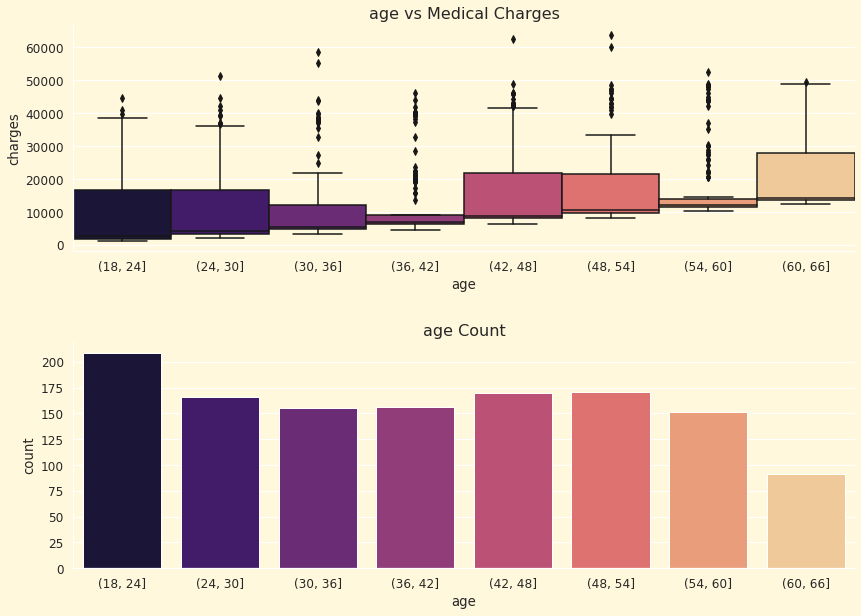

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (14, 10))
sns.boxplot(ax = axes[0], x = pd.cut(df['age'], [18, 24, 30, 36, 42, 48, 54, 60, 66]) , 
            y = 'charges', data = df, 
            width = 1, palette = 'magma')
axes[0].ticklabel_format(style = 'plain', axis = 'y')
axes[0].set_title('age vs Medical Charges', fontsize = 16)

sns.countplot(ax = axes[1], x = pd.cut(df['age'], [18, 24, 30, 36, 42, 48, 54, 60, 66]) , 
              data = df, palette = 'magma')
axes[1].set_title(('age Count'), fontsize = 16)
plt.subplots_adjust(hspace = 0.4)

In [16]:
num_data = df[['age','bmi','children']]
cat_data = df[['sex','smoker','region']]
class_target = df[['charges']]

In [17]:
num_data.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [18]:
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [19]:
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [20]:
num_data = pd.concat([num_data, cat_data], axis=1)
num_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [21]:
class_target.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [22]:
#defining features (X) and (Y)
X = num_data
Y = class_target

In [23]:
print(X)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0       

In [24]:
print(Y)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [25]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
norm_data = sc.fit_transform(X)
X = pd.DataFrame(norm_data, columns=X.columns) 
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [26]:
# mean s error
mse = []


# Linear Regression with single and mutiple regression 

In [27]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#Step2: define linear regression model object
LR = LinearRegression()

#Step 3: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(LR,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))

Cross Validation Mean Squared Error: 36938709.969 +/- 5789748.039


In [28]:
#compare single linear regression
cols = list(X.columns) 
mse = [] #array of mean_squared_error

# loop through each feature (column)
for i in cols: 
    LR = LinearRegression()
    cv_results = cross_validate(LR,X[[i]],Y, cv=10, scoring='neg_mean_squared_error')
    #LR.fit(x_train[[i]], y_train)
    #y_pred = LR.predict(x_test[[i]])
    mse.append(abs(cv_results['test_score']).mean())

findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.


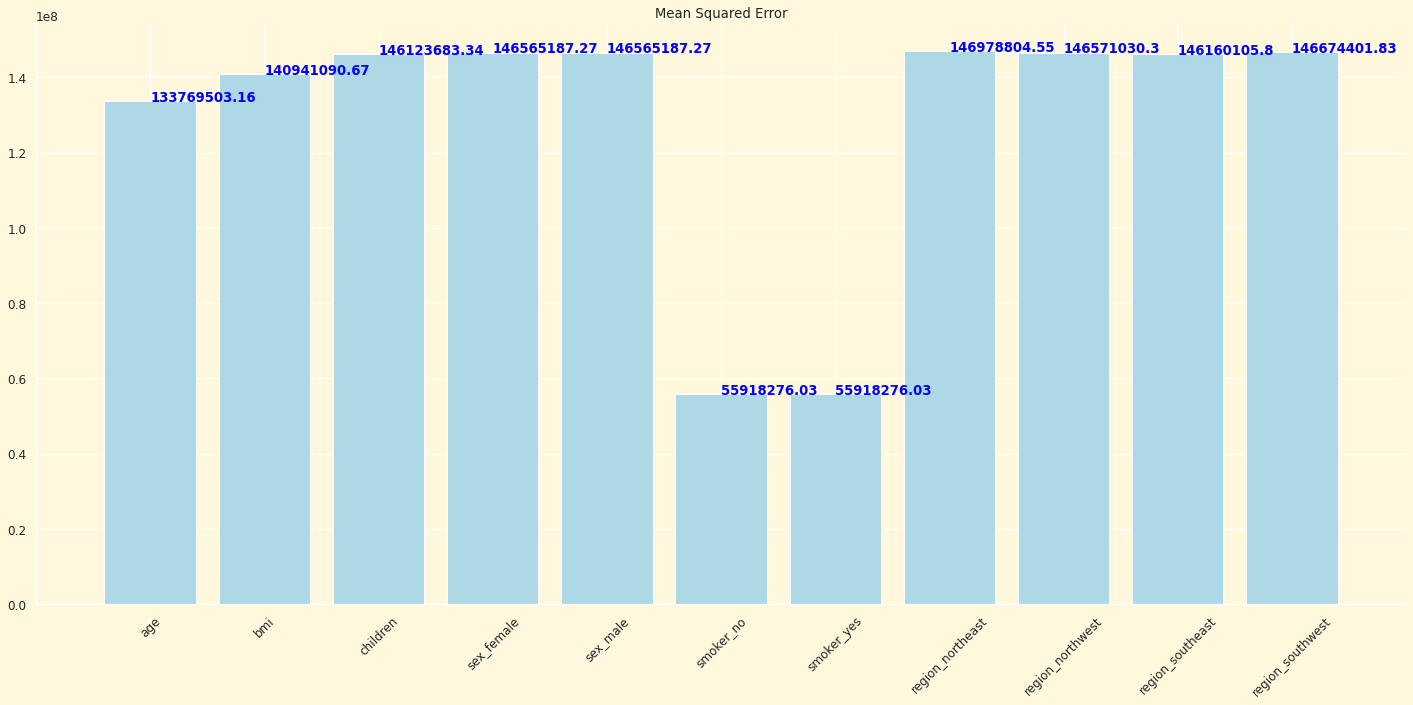

In [29]:
# created a plot that compare mean_squared_error of each feature
f, ax = plt.subplots(figsize=(20,10))
plt.title('Mean Squared Error')
no_of_features = len(mse)
plt.bar(range(no_of_features), mse, color='lightblue', align='center')
plt.xticks(range(no_of_features), cols, rotation=45)
plt.xlim([-1, no_of_features])

# set individual bar lables with accuracy value
for i, v in enumerate(mse):
    plt.text(i, v, str(round(v,2)), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import cross_validate
#Fit and test the model with cross validation with 10 folds

cv_results = cross_validate(LR, X,Y, cv=10, return_train_score=True)
cv_results

{'fit_time': array([0.004004  , 0.00300264, 0.00200176, 0.00200176, 0.00300312,
        0.00300288, 0.00200224, 0.00300217, 0.00300288, 0.00200176]),
 'score_time': array([0.00200152, 0.002002  , 0.002002  , 0.002002  , 0.00200152,
        0.00200129, 0.002002  , 0.00200152, 0.00200176, 0.002002  ]),
 'test_score': array([0.78525401, 0.73172208, 0.73441947, 0.66880787, 0.77164545,
        0.79000011, 0.79173429, 0.66917937, 0.74247582, 0.76408374]),
 'train_score': array([0.74582895, 0.75257538, 0.75220249, 0.75765138, 0.7477932 ,
        0.74132418, 0.74572907, 0.75957119, 0.75141093, 0.74712122])}

In [31]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.78525401 0.73172208 0.73441947 0.66880787 0.77164545 0.79000011
 0.79173429 0.66917937 0.74247582 0.76408374]
Cross Validation Accuracy: 0.745 +/- 0.043


# Lasso Regression